In [1]:
# Required packages
import os
import time
import pandas as pd
from pymongo import MongoClient
from dotenv import load_dotenv

# MongoDB setup
MONGO_URI = "mongodb://localhost:27017/"
client = MongoClient(MONGO_URI)
db = client["my_virtualgenesis"]

# List available collections
collections = db.list_collection_names()
swap_collections = [col for col in collections if col.endswith("_swap2")]

print(f"Found {len(swap_collections)} swap collections:")
for col in swap_collections:
    print(" -", col)


Found 13 swap collections:
 - roast_swap2
 - jarvis_swap2
 - lucien_swap2
 - afath_swap2
 - virgen_swap2
 - biz_swap2
 - super_swap2
 - vgn_swap2
 - ling_swap2
 - xllm2_swap2
 - arbus_swap2
 - maneki_swap2
 - axr_swap2


In [2]:
# Load a collection from the list of swap collections
collection_name = swap_collections[0]  
print(f"Loading collection: {collection_name}")

# Load the collection into a DataFrame
cursor = db[collection_name].find()
df = pd.DataFrame(list(cursor))

# Display basic info
print(f"Loaded {len(df)} records from {collection_name}")
df.head()

Loading collection: roast_swap2
Loaded 3696 records from roast_swap2


,_id,blockNumber,txHash,txLink,lp,maker,swapType,timestamp,timestampReadable,label,...,fee_native,ROAST_IN,Virtual_OUT,Tax_1pct,ROAST_IN_BeforeTax,ROAST_IN_AfterTax,Virtual_IN,ROAST_OUT,ROAST_OUT_BeforeTax,ROAST_OUT_AfterTax
0,6852575fc762b4b38a8e6c6f,30094489,0xad3c57b79a8af15266c3ec55011091868260bdd01d8b...,https://basescan.org/tx/0xad3c57b79a8af15266c3...,0x4680Da938e5236D607462283C187FE8876c58960,0xAAAA72F78703D6249a39770a50D92493fE4F4Cf1,sell,1750226783,2025-05-11 15:45:25,swap,...,0.014977,929.215917,2.671274e+06,9.386019,938.601937,929.215917,NaN,NaN,NaN,NaN
1,68525761c762b4b38a8e6c7c,30094489,0x8f3a2828418353a57ec4dfb8ab6104afe09e2b60e884...,https://basescan.org/tx/0x8f3a2828418353a57ec4...,0x4680Da938e5236D607462283C187FE8876c58960,0x0000004ED6836060038E2d529BC25E2Fcc7aF549,sell,1750226785,2025-05-11 15:45:25,swap,...,0.002746,396.210364,1.104534e+06,4.002125,400.212489,396.210364,NaN,NaN,NaN,NaN
2,68525763c762b4b38a8e6c89,30094489,0xb393e593553bc81c414fb253570bb19fac543fcc2045...,https://basescan.org/tx/0xb393e593553bc81c414f...,0x4680Da938e5236D607462283C187FE8876c58960,0xFc42e4a597bbb11668B1fCE61444d5971c067f98,sell,1750226787,2025-05-11 15:45:25,swap,...,0.000314,30000.000000,4.922339e+07,303.030303,30303.030303,30000.000000,NaN,NaN,NaN,NaN
3,68525764c762b4b38a8e6c95,30094489,0x20ab07b3cc7b64920472b624e1c9e6daf7ffb1b8107e...,https://basescan.org/tx/0x20ab07b3cc7b64920472...,0x4680Da938e5236D607462283C187FE8876c58960,0xEE9b2bE4dB00Abf489BCb3CF43b7E602CF98D8f1,sell,1750226788,2025-05-11 15:45:25,swap,...,0.000042,488.000000,4.718806e+05,4.929293,492.929293,488.000000,NaN,NaN,NaN,NaN
4,68525767c762b4b38a8e6ca5,30094489,0x5ef82af2320e57e9a122e731a2798bf4cda8215e59c2...,https://basescan.org/tx/0x5ef82af2320e57e9a122...,0x4680Da938e5236D607462283C187FE8876c58960,0x865487f18821Aa9181d187ce5dE91A1e40aD81Fe,sell,1750226791,2025-05-11 15:45:25,swap,...,0.000002,32500.000000,2.173383e+07,328.282828,32828.282828,32500.000000,NaN,NaN,NaN,NaN


In [3]:
token_collections = [
    "xllm2_swap2",
    "afath_swap2",
    "biz_swap2",
    "super_swap2",   
    "ling_swap2",
    "jarvis_swap2",
    "lucien_swap2",
    "vgn_swap2",
    "maneki_swap2",
    "arbus_swap2",
    "axr_swap2",
    "roast_swap2",
    "virgen_swap2"
]

# Combine all token swaps into one DataFrame 
df_list = []

for col_name in token_collections:
    collection = db[col_name]
    data = list(collection.find({"swapType": {"$in": ["buy", "sell"]}}))
    if data:
        df_temp = pd.DataFrame(data)

        # Ensure column names are consistent across tokens
        df_temp.columns = [col.strip() for col in df_temp.columns]

        # Add one simple token name column
        df_temp["token"] = col_name.replace("_swap2", "")
        
        df_list.append(df_temp)

# Combine all into one DataFrame with consistent columns
df = pd.concat(df_list, ignore_index=True)

# Drop duplicate columns if any sneak in (safety net)
df = df.loc[:, ~df.columns.duplicated()]

# Final check
print(f"Combined total records: {len(df)}")
print("Final Columns:", df.columns.tolist())
df.head()


Combined total records: 36710
Final Columns: ['_id', 'blockNumber', 'txHash', 'txLink', 'lp', 'maker', 'swapType', 'timestamp', 'timestampReadable', 'label', 'receiver', 'fee_native', 'Virtual_IN', 'XLLM2_OUT', 'Tax_1pct', 'XLLM2_OUT_BeforeTax', 'XLLM2_OUT_AfterTax', 'XLLM2_IN', 'Virtual_OUT', 'XLLM2_IN_BeforeTax', 'XLLM2_IN_AfterTax', 'token', 'AFATH_IN', 'AFATH_IN_BeforeTax', 'AFATH_IN_AfterTax', 'AFATH_OUT', 'AFATH_OUT_BeforeTax', 'AFATH_OUT_AfterTax', 'BIZ_OUT', 'BIZ_OUT_BeforeTax', 'BIZ_OUT_AfterTax', 'BIZ_IN', 'BIZ_IN_BeforeTax', 'BIZ_IN_AfterTax', 'SUPER_OUT', 'SUPER_OUT_BeforeTax', 'SUPER_OUT_AfterTax', 'SUPER_IN', 'SUPER_IN_BeforeTax', 'SUPER_IN_AfterTax', 'LING_OUT', 'LING_OUT_BeforeTax', 'LING_OUT_AfterTax', 'LING_IN', 'LING_IN_BeforeTax', 'LING_IN_AfterTax', 'JARVIS_OUT', 'JARVIS_OUT_BeforeTax', 'JARVIS_OUT_AfterTax', 'JARVIS_IN', 'JARVIS_IN_BeforeTax', 'JARVIS_IN_AfterTax', 'LUCIEN_IN', 'LUCIEN_IN_BeforeTax', 'LUCIEN_IN_AfterTax', 'LUCIEN_OUT', 'LUCIEN_OUT_BeforeTax', 'LUC

,_id,blockNumber,txHash,txLink,lp,maker,swapType,timestamp,timestampReadable,label,...,ROAST_IN_AfterTax,ROAST_OUT,ROAST_OUT_BeforeTax,ROAST_OUT_AfterTax,VIRGEN_OUT,VIRGEN_OUT_BeforeTax,VIRGEN_OUT_AfterTax,VIRGEN_IN,VIRGEN_IN_BeforeTax,VIRGEN_IN_AfterTax
0,6852575fc762b4b38a8e6c72,30345132,0xfca0b69361d85f935e38bb6c28341b0c8d8e4aa46e81...,https://basescan.org/tx/0xfca0b69361d85f935e38...,0x16A8397715156d362965D5127278B6Ba69330670,0x2dF01888FDa9250AA5D0Ed908867f180d931eEBd,buy,1750226783,2025-05-17 11:00:11,swap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68525761c762b4b38a8e6c80,30345132,0xe32cc88a31331611c3668a5952afb060fe918d276611...,https://basescan.org/tx/0xe32cc88a31331611c366...,0x16A8397715156d362965D5127278B6Ba69330670,0x6Bdc93Ab924aeA39628108C09C0F36BB66161383,buy,1750226785,2025-05-17 11:00:11,swap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68525763c762b4b38a8e6c8d,30345132,0x71bbf1cd31a8b3c560dddfc4ef8f1466024c5cd3cb76...,https://basescan.org/tx/0x71bbf1cd31a8b3c560dd...,0x16A8397715156d362965D5127278B6Ba69330670,0x7a88bBd329c7440Ba416821B059BC95818012Adf,buy,1750226787,2025-05-17 11:00:11,swap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68525765c762b4b38a8e6c9a,30345132,0x01c780fe3c286d0c272727d3de2c15b3c18ad5cb3d8d...,https://basescan.org/tx/0x01c780fe3c286d0c2727...,0x16A8397715156d362965D5127278B6Ba69330670,0xEB1dec6691F1f875402B1f8c8037994f98F4c544,buy,1750226789,2025-05-17 11:00:11,swap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68525767c762b4b38a8e6ca6,30345132,0x30c74d502fd5b2385197c69a03d9d0a39b0df8b22dba...,https://basescan.org/tx/0x30c74d502fd5b2385197...,0x16A8397715156d362965D5127278B6Ba69330670,0xe45Bf050412AE251aa623Be6E516fA508Ad74CCC,buy,1750226791,2025-05-17 11:00:11,swap,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
required_cols = {"maker", "timestampReadable", "swapType"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing one of required columns: {required_cols}")

# Filter and sort relevant transactions
df_filtered = df[df["swapType"].isin(["buy", "sell"])].copy()
df_filtered = df_filtered.sort_values(by=["maker", "timestampReadable"])

# atching Logic 
buckets = {}
matched_count = 0

for maker, group in df_filtered.groupby("maker"):
    group = group.sort_values("timestampReadable")
    unmatched_sells = 0
    matched_for_maker = 0

    for _, row in group.iterrows():
        if row["swapType"] == "sell":
            unmatched_sells += 1
        elif row["swapType"] == "buy" and unmatched_sells > 0:
            matched_for_maker += 1
            unmatched_sells -= 1

    buckets[maker] = matched_for_maker
    matched_count += matched_for_maker

# Total counts
total_buys = len(df_filtered[df_filtered["swapType"] == "buy"])
total_sells = len(df_filtered[df_filtered["swapType"] == "sell"])

# Summary
print(f"Total buy transactions: {total_buys}")
print(f"Total sell transactions: {total_sells}")
print(f"Matched sell-to-buy pairs: {matched_count}")
print(f"Unmatched sell transactions: {total_sells - matched_count}")


Total buy transactions: 18889
Total sell transactions: 17821
Matched sell-to-buy pairs: 5086
Unmatched sell transactions: 12735


Matched Buy→Sell Time Differences Distribution


,Time Bucket,Count
0,<=10s,422
1,11–30s,265
2,31–60s,233
3,61–300s,1043
4,>300s,4892


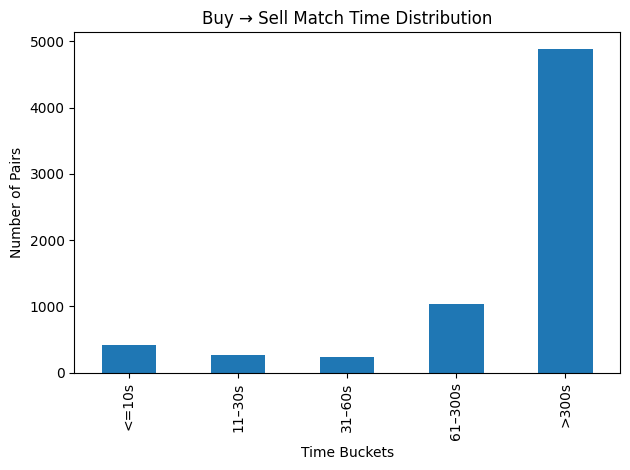

In [6]:
# Time Difference Analysis 
required_cols = {"maker", "timestamp", "swapType"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing one of required columns: {required_cols}")

# Filter only buy/sell transactions and sort by maker and timestamp
df_filtered = df[df["swapType"].isin(["buy", "sell"])].copy()
df_filtered = df_filtered.sort_values(by=["maker", "timestamp"])

matched_diffs = []

# Group by maker address
for maker, group in df_filtered.groupby("maker"):
    group = group.sort_values("timestamp")

    buys = group[group["swapType"] == "buy"].to_dict("records")
    sells = group[group["swapType"] == "sell"].to_dict("records")

    used_buy_indices = set()

    for sell in sells:
        sell_ts = sell["timestamp"]
        for i, buy in enumerate(buys):
            if i in used_buy_indices:
                continue
            buy_ts = buy["timestamp"]
            if buy_ts < sell_ts:
                time_diff = sell_ts - buy_ts
                matched_diffs.append(time_diff)
                used_buy_indices.add(i)
                break

# Bucketize time differences 
buckets = {
    "<=10s": 0,
    "11–30s": 0,
    "31–60s": 0,
    "61–300s": 0,
    ">300s": 0
}

for diff in matched_diffs:
    if diff <= 10:
        buckets["<=10s"] += 1
    elif diff <= 30:
        buckets["11–30s"] += 1
    elif diff <= 60:
        buckets["31–60s"] += 1
    elif diff <= 300:
        buckets["61–300s"] += 1
    else:
        buckets[">300s"] += 1

# Display result
timing_df = pd.DataFrame(list(buckets.items()), columns=["Time Bucket", "Count"])
print("Matched Buy→Sell Time Differences Distribution")
display(timing_df)

import matplotlib.pyplot as plt
timing_df.plot(x="Time Bucket", y="Count", kind="bar", legend=False)
plt.title("Buy → Sell Match Time Distribution")
plt.ylabel("Number of Pairs")
plt.xlabel("Time Buckets")
plt.tight_layout()
plt.show()


Top 5 Peak Hours for Swap Transactions:
    hour  transaction_count
13    13               8175
16    16               4842
11    11               4154
14    14               3390
15    15               2815


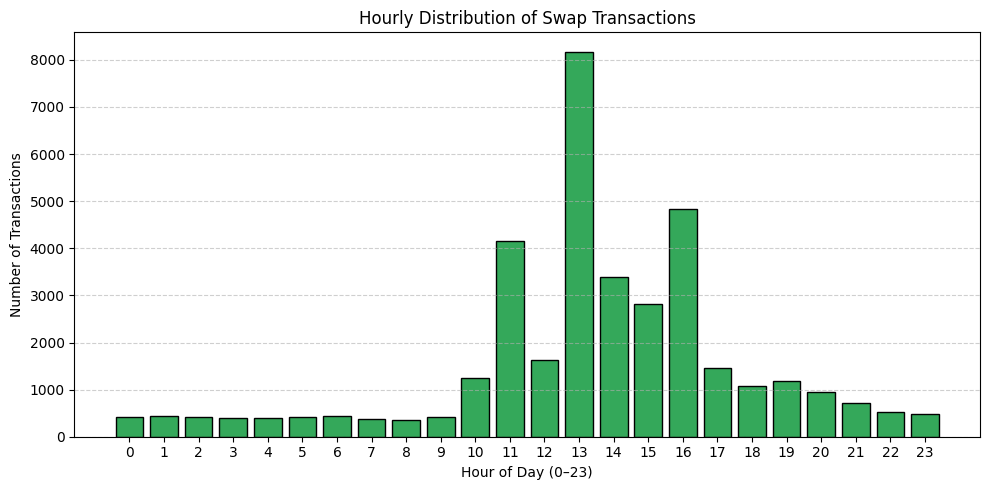

In [8]:
import matplotlib.pyplot as plt

# Convert timestampReadable to datetime (if not already done)
df["timestamp_dt"] = pd.to_datetime(df["timestampReadable"])

# Extract hour from timestamp
df["hour"] = df["timestamp_dt"].dt.hour

# Group by hour and count transactions
hourly_counts = df.groupby("hour").size().reset_index(name="transaction_count")

# Sort to find peak hours
peak_hours = hourly_counts.sort_values(by="transaction_count", ascending=False)

print("Top 5 Peak Hours for Swap Transactions:")
print(peak_hours.head())

# Plot
plt.figure(figsize=(10, 5))
plt.bar(hourly_counts["hour"], hourly_counts["transaction_count"], color="#34A85A", edgecolor="black")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Transactions")
plt.title("Hourly Distribution of Swap Transactions")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


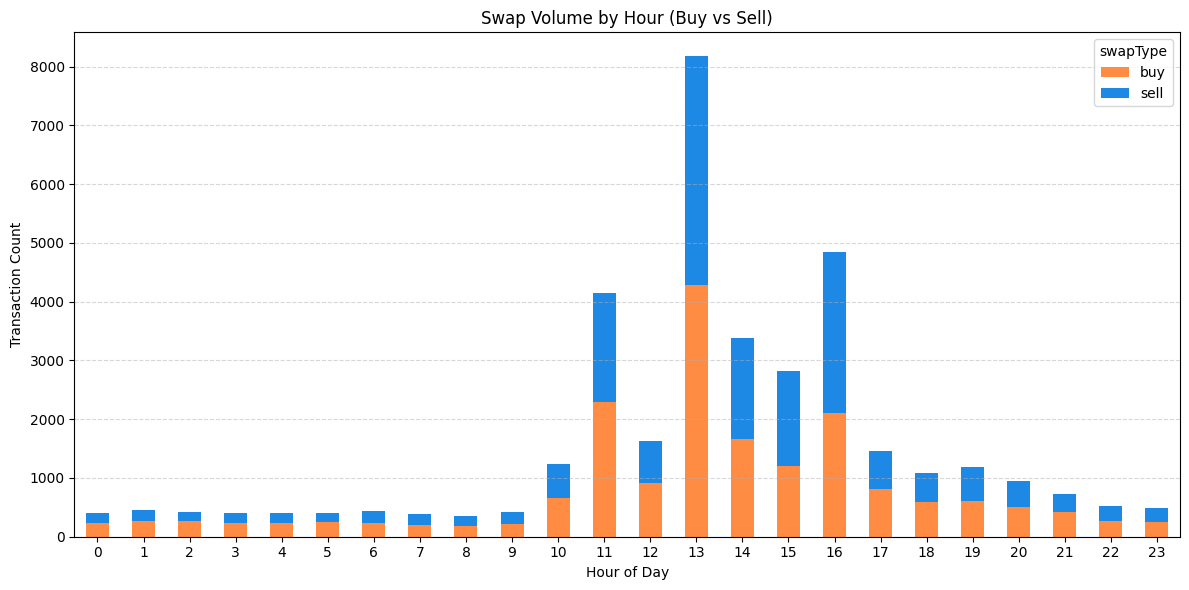

In [9]:
hourly_types = df.groupby(["hour", "swapType"]).size().unstack().fillna(0)

hourly_types.plot(kind="bar", stacked=True, figsize=(12, 6), color=["#FF8C42", "#1E88E5"])
plt.title("Swap Volume by Hour (Buy vs Sell)")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
# Define size bins and labels
bins = [0, 100, 1_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, float("inf")]
labels = ["0–100", "100–1K", "1K–10K", "10K–50K", "50K–100K", "100K–500K", "500K–1M", ">1M"]

# Token list
tokens = ["xllm2", "afath", "biz", "super", "ling", "jarvis", "lucien", "vgn", "maneki", "arbus", "axr", "roast", "virgen"]

# Collect all buy/sell values across tokens
all_buy_values = []
all_sell_values = []

for token in tokens:
    buy_col = f"{token.upper()}_OUT_AfterTax"
    sell_col = f"{token.upper()}_IN"

    if buy_col in df.columns:
        all_buy_values.append(df[df["swapType"] == "buy"][buy_col].dropna())

    if sell_col in df.columns:
        all_sell_values.append(df[df["swapType"] == "sell"][sell_col].dropna())

# Combine all values into single Series
combined_buy = pd.concat(all_buy_values) if all_buy_values else pd.Series(dtype=float)
combined_sell = pd.concat(all_sell_values) if all_sell_values else pd.Series(dtype=float)

# Bin the values
buy_bins = pd.cut(combined_buy, bins=bins, labels=labels, right=False)
sell_bins = pd.cut(combined_sell, bins=bins, labels=labels, right=False)

# Count the number in each bin
buy_dist = buy_bins.value_counts().sort_index().rename("Buy Count")
sell_dist = sell_bins.value_counts().sort_index().rename("Sell Count")

# Combine and display
swap_size_distribution = pd.concat([buy_dist, sell_dist], axis=1).fillna(0).astype(int)
swap_size_distribution.reset_index(names="Swap Size Range", inplace=True)

# Final result
swap_size_distribution


,Swap Size Range,Buy Count,Sell Count
0,0–100,855,1582
1,100–1K,2241,1928
2,1K–10K,5348,4297
3,10K–50K,4401,4009
4,50K–100K,1678,1536
5,100K–500K,2898,3053
6,500K–1M,677,617
7,>1M,765,799


In [16]:
# Define your token list
tokens = ["xllm2", "afath", "biz", "super", "ling", "jarvis", "lucien", "vgn", "maneki", "arbus", "axr", "roast", "virgen"]

# Initialize dictionaries to store volume data
buy_volumes = {}
sell_volumes = {}

# Loop through tokens and accumulate volume per maker
for token in tokens:
    buy_col = f"{token.upper()}_OUT_AfterTax"
    sell_col = f"{token.upper()}_IN"
    
    # Buy side
    if buy_col in df.columns:
        token_buy = df[df["swapType"] == "buy"][["maker", buy_col]].dropna()
        for _, row in token_buy.iterrows():
            buy_volumes[row["maker"]] = buy_volumes.get(row["maker"], 0) + row[buy_col]
    
    # Sell side
    if sell_col in df.columns:
        token_sell = df[df["swapType"] == "sell"][["maker", sell_col]].dropna()
        for _, row in token_sell.iterrows():
            sell_volumes[row["maker"]] = sell_volumes.get(row["maker"], 0) + row[sell_col]

# Convert to DataFrames
buy_df = pd.DataFrame(list(buy_volumes.items()), columns=["maker", "buy_volume"])
sell_df = pd.DataFrame(list(sell_volumes.items()), columns=["maker", "sell_volume"])

# Merge buy & sell volumes
volume_df = pd.merge(buy_df, sell_df, on="maker", how="outer").fillna(0)

# Calculate total volume
volume_df["total_volume"] = volume_df["buy_volume"] + volume_df["sell_volume"]

# Sort and get top 10
top_traders = volume_df.sort_values(by="total_volume", ascending=False).head(20).reset_index(drop=True)

top_traders


,maker,buy_volume,sell_volume,total_volume
0,0xCd45C098Eab88F95E2bC49Ebe1145e6470711790,3.863865e+07,5.332523e+08,5.718909e+08
1,0x8F761F127ae9daa245b4203C9Cc2CC5285fE25A8,6.437545e+07,8.149035e+07,1.458658e+08
2,0x12A086420211cc83EB2DD4b1b2a6DbB0be7AcE74,1.099585e+08,0.000000e+00,1.099585e+08
3,0x584510dAD346f51096166083B3e87bFb7918f72E,4.710198e+07,4.663096e+07,9.373294e+07
4,0xd556F9C3A8cC5E08E81d15C475e34230b04DCeA9,3.923552e+07,3.405414e+07,7.328966e+07
5,0x0c1f250CfC6CB85374937a649D53ba45B910Fbb3,6.516472e+07,7.873270e+06,7.303799e+07
6,0x95F3DC090a070397ad39fE708BAE8713dC89C1d1,5.755561e+07,0.000000e+00,5.755561e+07
7,0x55edFA0671C2fAD1908B61587f66D5b998F62026,2.718987e+07,2.691797e+07,5.410784e+07
8,0x0e2E1E0B03A591386ccFE68B764D717e8992ed07,2.797497e+07,2.566735e+07,5.364232e+07
9,0x7babf08bB0BFF4A8513820Dd70E56b33539BD247,0.000000e+00,5.052007e+07,5.052007e+07


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nSummary statistics for fee_native:")
print(df["fee_native"].describe())

# Step 4: Top 20 highest fees
top_fees = df[["maker", "fee_native", "swapType", "token", "timestampReadable"]].sort_values(by="fee_native", ascending=False).head(20)
print("Top 20 highest fees paid:")
print(top_fees)



Summary statistics for fee_native:
count    3.607800e+04
mean     1.078314e-04
std      2.262160e-03
min      4.190813e-09
25%      6.996017e-07
50%      1.601516e-06
75%      4.476473e-06
max      2.980350e-01
Name: fee_native, dtype: float64
Top 20 highest fees paid:
                                            maker  fee_native swapType  \
25523  0xAAAA72F78703D6249a39770a50D92493fE4F4Cf1    0.298035      buy   
25530  0x55788632743Cc7390Df928E837722574Ec5093e9    0.141718      buy   
29382  0x6813cec8AE3B7b0F09D2Db373711B99a5E0a7349    0.075268     sell   
18090  0xAAAA72F78703D6249a39770a50D92493fE4F4Cf1    0.073984      buy   
7      0xAAAA72F78703D6249a39770a50D92493fE4F4Cf1    0.071954      buy   
7592   0xAAAA72F78703D6249a39770a50D92493fE4F4Cf1    0.069891      buy   
30236  0xb51ff2F65B935142aab32aBEfa1C0E29A4161D31    0.059913     sell   
22578  0xFc0cB9E365d86d656d6a5102d41E65D4B6A33288    0.051650     sell   
25524  0xdcA056E86F211a7e6F03c2f064491AbF83D007c4    0.050177  

In [21]:
# Step 1: Load launch info from my_personas
launch_cursor = db["my_personas"].find()
launch_data = list(launch_cursor)

# Build a dict: {symbol_lowercase: launch_block_number}
launch_dict = {
    entry["symbol"].lower(): entry["blockNumber"]
    for entry in launch_data
    if "symbol" in entry and "blockNumber" in entry
}

# Prepare result list
results = []

# Step 2: Iterate through your swap collections
for col_name in token_collections:  # e.g., "roast_swap2"
    token_symbol = col_name.replace("_swap2", "").lower()

    # Get launch block number for this token
    launch_block = launch_dict.get(token_symbol)
    if launch_block is None:
        print(f"Launch block not found for token: {token_symbol}")
        continue

    # Fetch all `buy` swaps in that launch block
    collection = db[col_name]
    swap_data = list(collection.find({
        "swapType": "buy",
        "blockNumber": launch_block
    }))

    if not swap_data:
        continue

    df_swaps = pd.DataFrame(swap_data)
    buyer_count = df_swaps["maker"].nunique()

    results.append({
        "token": token_symbol.upper(),
        "launch_block": launch_block,
        "buyers_in_launch_block": buyer_count
    })

# Step 3: Display as DataFrame
import pandas as pd
launch_buy_df = pd.DataFrame(results)
print(launch_buy_df)


    token  launch_block  buyers_in_launch_block
0   XLLM2      30345132                       6
1     BIZ      30523773                       5
2   SUPER      30262331                       3
3    LING      30230769                       1
4  JARVIS      31035462                       6
5  MANEKI      30483931                       5
6   ARBUS      30388689                       3
7     AXR      30219359                       4
8  VIRGEN      30564766                       6


In [22]:
# Step 1: Load launch info from my_personas
launch_cursor = db["my_personas"].find()
launch_data = list(launch_cursor)

# Build a dict: {symbol_lowercase: launch_block_number}
launch_dict = {
    entry["symbol"].lower(): entry["blockNumber"]
    for entry in launch_data
    if "symbol" in entry and "blockNumber" in entry
}

# Prepare result list
results = []

# Step 2: Iterate through your swap collections
for col_name in token_collections:  # e.g., "roast_swap2"
    token_symbol = col_name.replace("_swap2", "").lower()

    # Get launch block number for this token
    launch_block = launch_dict.get(token_symbol)
    if launch_block is None:
        print(f"Launch block not found for token: {token_symbol}")
        continue

    # Fetch all `buy` swaps in that launch block
    collection = db[col_name]
    swap_data = list(collection.find({
        "swapType": "buy",
        "blockNumber": launch_block
    }))

    if not swap_data:
        continue

    df_swaps = pd.DataFrame(swap_data)
    buyers = df_swaps["maker"].dropna().unique().tolist()

    results.append({
        "token": token_symbol.upper(),
        "launch_block": launch_block,
        "buyer_count": len(buyers),
        "buyers": buyers
    })

# Step 3: Display or export the results
import pandas as pd
launch_buyers_df = pd.DataFrame(results)

# Display all token buyers
for _, row in launch_buyers_df.iterrows():
    print(f"\nToken: {row['token']}")
    print(f"Launch Block: {row['launch_block']}")
    print(f"Buyers in Launch Block ({row['buyer_count']} total):")
    for buyer in row['buyers']:
        print(" -", buyer)



Token: XLLM2
Launch Block: 30345132
Buyers in Launch Block (6 total):
 - 0x2dF01888FDa9250AA5D0Ed908867f180d931eEBd
 - 0x6Bdc93Ab924aeA39628108C09C0F36BB66161383
 - 0x7a88bBd329c7440Ba416821B059BC95818012Adf
 - 0xEB1dec6691F1f875402B1f8c8037994f98F4c544
 - 0xe45Bf050412AE251aa623Be6E516fA508Ad74CCC
 - 0x895eeDf203691A1116D1c95916D19fC1dC9E13d4

Token: BIZ
Launch Block: 30523773
Buyers in Launch Block (5 total):
 - 0x9937D358F2142B831e9CB03F8521007D7c72c745
 - 0x43DAB6a57F6cB4256bC2aa616de2349e45b7f394
 - 0x5ABb362Bc613e6D76e539D376695C4a4E3ecbe78
 - 0x014b372F3F534892EfCAcEDa41081604eC6fE7f7
 - 0x01bB6EA19185373D2b7ABA12d1422F50f86B4184

Token: SUPER
Launch Block: 30262331
Buyers in Launch Block (3 total):
 - 0x15A707734DEc01Eef512019DeA6A3f3672Bcd652
 - 0xD93Be509e4793f930bCfFC8B5aD35a32E7371A95
 - 0x895eeDf203691A1116D1c95916D19fC1dC9E13d4

Token: LING
Launch Block: 30230769
Buyers in Launch Block (1 total):
 - 0xD93Be509e4793f930bCfFC8B5aD35a32E7371A95

Token: JARVIS
Launch Block: 